# Python Code Examples

## Prepare Data

In [42]:
import numpy.random as nr
nr.seed(12345)

data = nr.normal(10, 2, 50) # mean, std, number of entries

## Confident Interval

In [43]:
import statsmodels.stats.api as sms
alpha = 0.05
print(data.mean())
#use statsmodel package
print(sms.DescrStatsW(data).tconfint_mean(alpha))
#use scipy package
print(scipy.stats.t.interval(1-alpha, len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data)))

9.896096050337679
(9.249011351411818, 10.54318074926354)
(9.249011351411818, 10.54318074926354)


## Manual CI calculation:

For T-test, all under t-distribution

spipy.stats.t.ppf calculates z-score for x% value below that

spipy.stats.t.cdf calculates percentagy value blew x z-sore.

For Z test, under normal distribution

spipy.stats.norm.ppf spipy.stats.norm.cdf 

scipy.stats.norm.cdf(1) - 0.5 = 0.3413447460685429
means about 34% data is between mean and z-score 1, 0.5 refer to half of the data below mean.

In [44]:
import scipy
import numpy as np


def mean_confidence_interval(data, alpha=0.05):
    #Two tailed T test
    n = len(data)
    #Standard error = std / sqrt(number of sample)
    #m, se = np.mean(data), scipy.stats.sem(data)
    m, se = np.mean(data), data.std()/np.sqrt(n-1)

    #scipy.stats.t.ppf: T-test, Z-score for the edge of area cover % of the area(confidence level)
    #alpha/2, each end of distribution has alpha/2 left out, 
    #distance = Z-score * se
    h = se * scipy.stats.t.ppf(1 - alpha/2, n-1) #alpha/2 because half of alpha% data above mean, the other half will be below mean
    #print(se, h, scipy.stats.t.ppf((1+confidence)/2., n-1))
    return m, m-h, m+h

print(mean_confidence_interval(data, 0.05))
print(scipy.stats.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data)))


(9.896096050337679, 9.249011351411818, 10.54318074926354)
(9.249011351411818, 10.54318074926354)


## ppf explained:

distance away from mean: 1.959963984540054


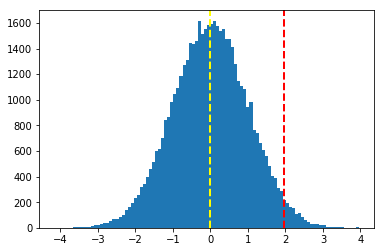

In [45]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample = nr.normal(size=50000)


# calculate a 95% confidence interval. 5% of the probability is outside this, 2.5% in each tail
#ci = stats.norm.interval(0.95, 0, 1)

#distance of std from mean, we actually calculate using 97.5%, because both side have 2.5% outside
h = scipy.stats.norm.ppf((1+0.95)/2) 
print("distance away from mean: %s" % h)

plt.hist(sample, bins=100)
# show the hypothesized population mean
plt.axvline(sample.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(h, color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this


plt.show()